# Linear Regression
## Question 1
Make a class called LinearRegression which provides two functions : fit and predict. Try to implement it from scratch. If stuck, refer to the examples folder.

In [1]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db


    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

## Question 2

Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the model created in question 1 and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs) to achieve losses close to that of the sklearn models.

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

In [22]:
df_real_estate = pd.read_csv('/content/Real estate.csv')
print("Dataset loaded successfully. Displaying the first 5 rows:")
df_real_estate.head()

Dataset loaded successfully. Displaying the first 5 rows:


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [23]:
print("Checking for null values in the dataset:")
df_real_estate.isnull().sum()

Checking for null values in the dataset:


,0
No,0
X1 transaction date,0
X2 house age,0
X3 distance to the nearest MRT station,0
X4 number of convenience stores,0
X5 latitude,0
X6 longitude,0
Y house price of unit area,0


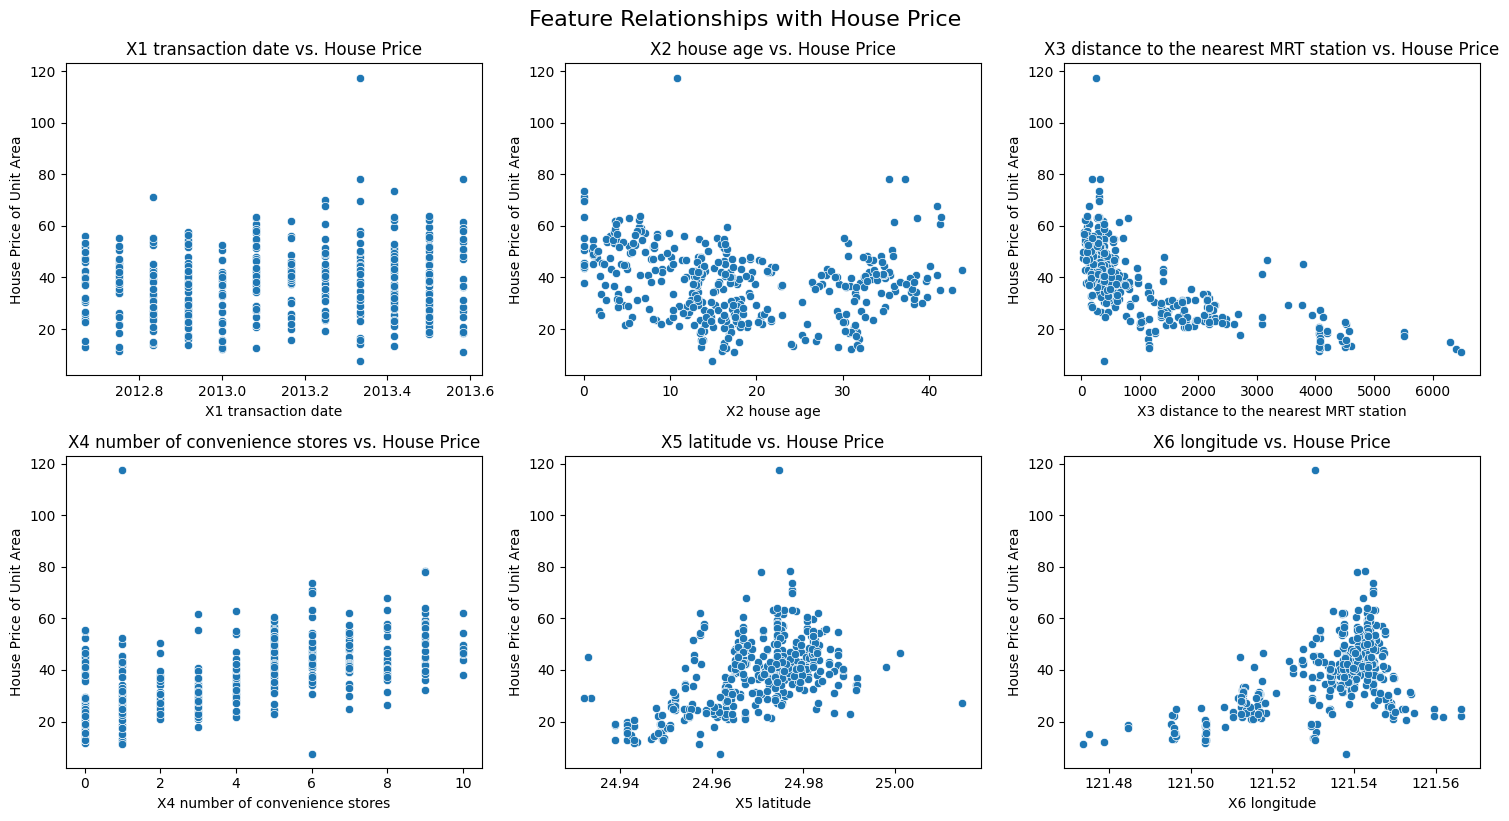

Scatter plots generated for feature relationships with house price.


In [40]:
target_column = 'Y house price of unit area'
feature_columns = [col for col in df_real_estate.columns if col not in ['No', target_column]]
n_features = len(feature_columns)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, feature in enumerate(feature_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(x=df_real_estate[feature], y=df_real_estate[target_column])
    plt.title(f'{feature} vs. House Price')
    plt.xlabel(feature)
    plt.ylabel('House Price of Unit Area')
    plt.tight_layout()

plt.suptitle('Feature Relationships with House Price', y=1.02, fontsize=16)
plt.show()
print("Scatter plots generated for feature relationships with house price.")

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df_real_estate.drop(columns=["X1 transaction date", "Y house price of unit area"])
y = df_real_estate["Y house price of unit area"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


In [28]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression as SklearnLinearRegression
custom_lr = LinearRegression(learning_rate=0.05, n_iterations=3000)
custom_lr.fit(X_train, y_train)

y_train_pred_custom = custom_lr.predict(X_train)
y_test_pred_custom  = custom_lr.predict(X_test)

custom_train_mse = mean_squared_error(y_train, y_train_pred_custom)
custom_test_mse  = mean_squared_error(y_test, y_test_pred_custom)

custom_train_r2 = r2_score(y_train, y_train_pred_custom)
custom_test_r2  = r2_score(y_test, y_test_pred_custom)

print("Custom Linear Regression")
print("Train MSE:", custom_train_mse)
print("Test  MSE:", custom_test_mse)
print("Train R2 :", custom_train_r2)
print("Test  R2 :", custom_test_r2)


sklearn_lr = SklearnLinearRegression()
sklearn_lr.fit(X_train, y_train)

y_train_pred_sklearn = sklearn_lr.predict(X_train)
y_test_pred_sklearn  = sklearn_lr.predict(X_test)

sklearn_train_mse = mean_squared_error(y_train, y_train_pred_sklearn)
sklearn_test_mse  = mean_squared_error(y_test, y_test_pred_sklearn)

sklearn_train_r2 = r2_score(y_train, y_train_pred_sklearn)
sklearn_test_r2  = r2_score(y_test, y_test_pred_sklearn)

print("\nSklearn Linear Regression")
print("Train MSE:", sklearn_train_mse)
print("Test  MSE:", sklearn_test_mse)
print("Train R2 :", sklearn_train_r2)
print("Test  R2 :", sklearn_test_r2)


# Hyperparameter tuning
learning_rates = [0.01, 0.03, 0.05, 0.1]
iterations = [1000, 3000, 5000]

best_mse = float("inf")
best_params = None

for lr in learning_rates:
    for it in iterations:
        model = LinearRegression(learning_rate=lr, n_iterations=it)
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        mse = mean_squared_error(y_test, preds)

        if mse < best_mse:
            best_mse = mse
            best_params = (lr, it)

print("\nBest Custom Model Parameters")
print("Learning Rate:", best_params[0])
print("Iterations  :", best_params[1])
print("Best Test MSE:", best_mse)


Custom Linear Regression
Train MSE: 84.84486070819433
Test  MSE: 65.9682566221509
Train R2 : 0.5559595683418727
Test  R2 : 0.5841077106675439

Sklearn Linear Regression
Train MSE: 83.13146061738071
Test  MSE: 67.85584560046442
Train R2 : 0.5649267457239492
Test  R2 : 0.5722075371339914

Best Custom Model Parameters
Learning Rate: 0.05
Iterations  : 3000
Best Test MSE: 65.9682566221509


# Logistic Regression
## Question 3

The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.

In [41]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target

#Normalize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42
)



5. Write code for the sigmoid function and Logistic regression.


In [30]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)


class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        # Initialise hyperparameters
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)

        # Initialize parameters
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        # Gradient Descent
        for _ in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(z)

            # Gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(z)
        return (y_pred >= 0.5).astype(int)


6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .

In [31]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression as SkLogisticRegression


custom_model = LogisticRegression(learning_rate=0.01, epochs=3000)
custom_model.fit(X_train, y_train)

y_pred_custom = custom_model.predict(X_test)
custom_acc = accuracy_score(y_test, y_pred_custom)

print("Custom Logistic Regression Accuracy:", custom_acc)


#Sklearn
penalties = ["l2", "l1", "elasticnet", None]

for penalty in penalties:
    if penalty == "l1":
        model = SkLogisticRegression(penalty="l1", solver="saga", max_iter=5000)
    elif penalty == "elasticnet":
        model = SkLogisticRegression(
            penalty="elasticnet", solver="saga", l1_ratio=0.5, max_iter=5000
        )
    elif penalty is None:
        model = SkLogisticRegression(penalty=None, solver="lbfgs", max_iter=5000)
    else:  # l2
        model = SkLogisticRegression(penalty="l2", solver="lbfgs", max_iter=5000)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Sklearn Logistic Regression (penalty={penalty}) Accuracy: {acc}")


Custom Logistic Regression Accuracy: 0.993006993006993
Sklearn Logistic Regression (penalty=l2) Accuracy: 0.9790209790209791
Sklearn Logistic Regression (penalty=l1) Accuracy: 0.9790209790209791
Sklearn Logistic Regression (penalty=elasticnet) Accuracy: 0.9790209790209791
Sklearn Logistic Regression (penalty=None) Accuracy: 0.9370629370629371


9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression as SkLogisticRegression


custom_model = LogisticRegression(learning_rate=0.01, epochs=3000)
custom_model.fit(X_train, y_train)

y_pred_custom = custom_model.predict(X_test)

print("Best Custom Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_custom))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_custom))


# Best SKLEARN model

sk_model = SkLogisticRegression(penalty="l2", solver="lbfgs", max_iter=5000)
sk_model.fit(X_train, y_train)

y_pred_sk = sk_model.predict(X_test)

print("\nBest Sklearn Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_sk))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_sk))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_sk))


Best Custom Logistic Regression
Accuracy: 0.993006993006993

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.99      1.00      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

Confusion Matrix:
[[53  1]
 [ 0 89]]

Best Sklearn Logistic Regression
Accuracy: 0.9790209790209791

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

Confusion Matrix:
[[53  1]
 [ 2 87]]


# KNN
## Question 4

How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass".

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [42]:
from sklearn.neighbors import KNeighborsClassifier
df = pd.read_csv("/content/glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [43]:

# X and y
X = df.drop(columns=["Type"])
y = df["Type"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [44]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        # Convert to numpy arrays
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X):
        X = np.array(X)
        predictions = []

        for x in X:
            # Compute distances to all training points
            distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]

            # Get indices of k nearest neighbors
            k_indices = np.argsort(distances)[:self.k]

            # Get labels of k nearest neighbors
            k_nearest_labels = self.y_train[k_indices]

            # Majority vote
            most_common = Counter(k_nearest_labels).most_common(1)[0][0]
            predictions.append(most_common)

        return np.array(predictions)


In [45]:
knn = KNN(k=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [46]:
from sklearn.metrics import accuracy_score

for k in [1, 3, 5, 7, 9]:
    knn_custom = KNN(k=k)
    knn_custom.fit(X_train, y_train)

    y_pred = knn_custom.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"Custom KNN | k = {k} | Accuracy = {acc:.3f}")


Custom KNN | k = 1 | Accuracy = 0.741
Custom KNN | k = 3 | Accuracy = 0.815
Custom KNN | k = 5 | Accuracy = 0.722
Custom KNN | k = 7 | Accuracy = 0.722
Custom KNN | k = 9 | Accuracy = 0.722


In [47]:
from sklearn.neighbors import KNeighborsClassifier

for k in [1, 3, 5, 7, 9]:
    knn_sklearn = KNeighborsClassifier(n_neighbors=k)
    knn_sklearn.fit(X_train, y_train)

    y_pred = knn_sklearn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"Sklearn KNN | k = {k} | Accuracy = {acc:.3f}")


Sklearn KNN | k = 1 | Accuracy = 0.741
Sklearn KNN | k = 3 | Accuracy = 0.796
Sklearn KNN | k = 5 | Accuracy = 0.741
Sklearn KNN | k = 7 | Accuracy = 0.722
Sklearn KNN | k = 9 | Accuracy = 0.722
